In [79]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import warnings
%matplotlib inline

In [80]:
Path = '../../data/firstRound_4h.csv'
df = pd.read_csv(Path)

In [81]:
Path2 = '../../data/First_round_results/CSVs/FirstRep1.csv'
df2 = pd.read_csv(Path2)
df2.set_index('Time',inplace=True)

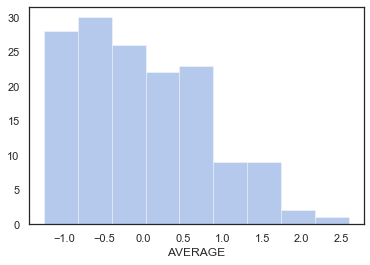

In [82]:
sns.set(style="white", palette="muted", color_codes=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(df['AVERAGE'], kde=False, color="b")

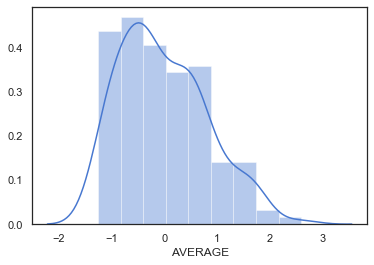

In [83]:
sns.distplot(df['AVERAGE'], kde=True, color="b")

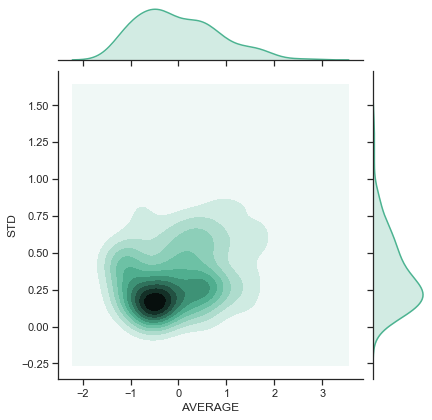

In [84]:
sns.set(style="ticks")

sns.jointplot(df['AVERAGE'], df['STD'],  kind="kde", color="#4CB391");

C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


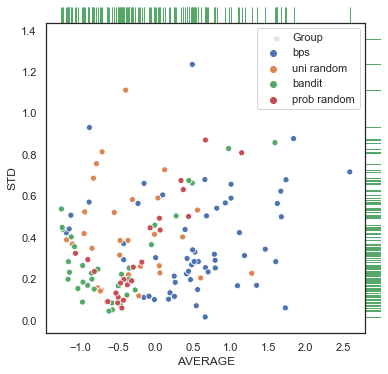

In [85]:
sns.set(style="white", color_codes=True)

grid = sns.JointGrid(df['AVERAGE'], df['STD'],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df['Group'])
grid.plot_marginals(sns.rugplot, height=1, color="g")

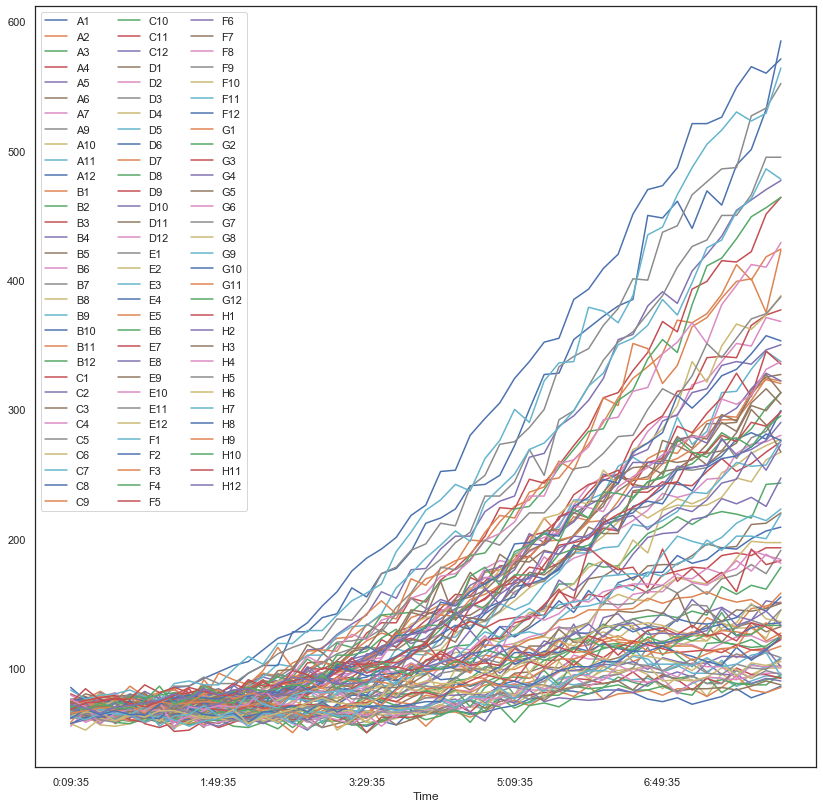

In [86]:
fig, ax = plt.subplots( figsize=(14,14))
df2.plot(ax = ax);
ax.legend(loc='upper left',ncol=3)

In [87]:
Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3)
#df3.drop([df3['AVERAGE'] == 2.592357],axis=1)
#df3.iloc[1:].loc[df3['Base'] == "T"]

C:\Users\HOL428\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1734: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


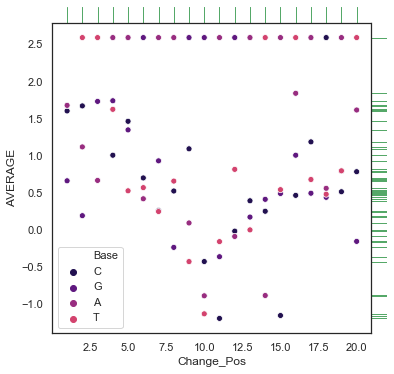

In [94]:
sns.set(style="white", color_codes=True,palette='magma')
grid = sns.JointGrid(df3['Change_Pos'].iloc[1:], df3['AVERAGE'].iloc[1:],  space=0, height=6, ratio=20)
grid.plot_joint(sns.scatterplot, color="g",hue=df3['Base'].iloc[1:])
grid.plot_marginals(sns.rugplot, height=1, color="g")

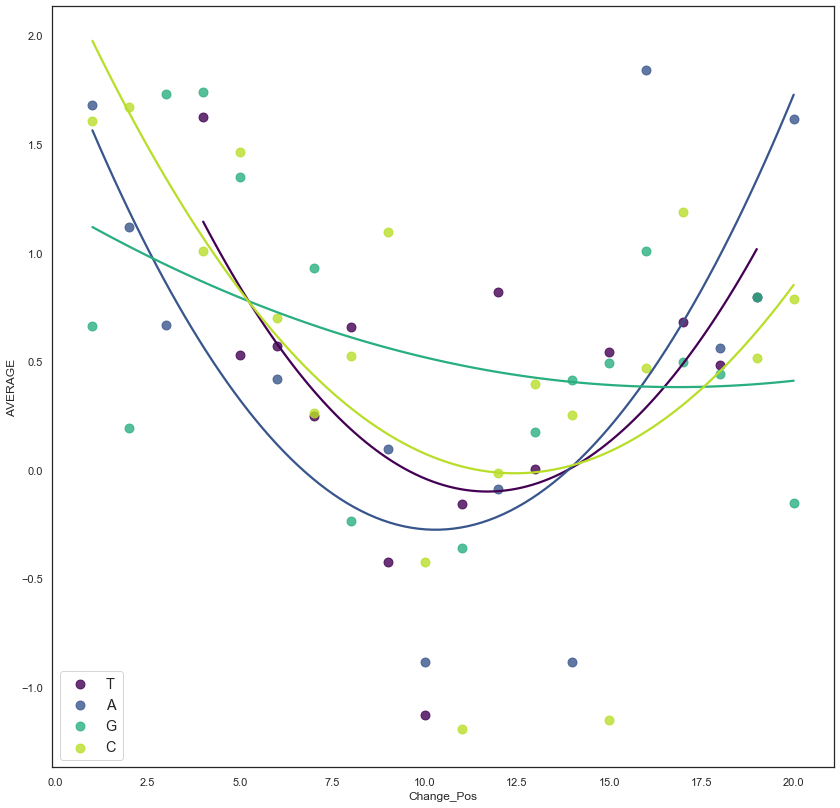

In [89]:
fig, ax = plt.subplots( figsize=(14,14))
ax1 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None, label='T', color = '#440154FF')
ax2 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None, label='A', color = '#39568CFF')
ax3 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None, label='G', color = '#29AF7FFF')
ax4 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3[df3.AVERAGE != 2.592357456].loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None, label='C', color = '#B8DE29FF')
ax.legend(fontsize="large");

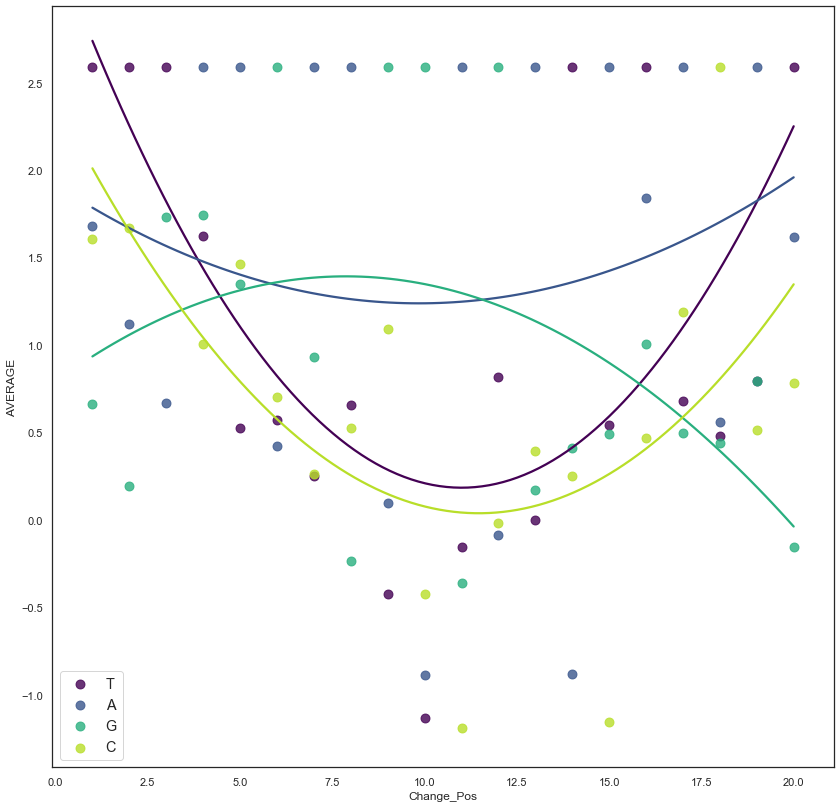

In [90]:
fig, ax = plt.subplots( figsize=(14,14))
ax1 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "T"], scatter_kws={"s": 80}, order=2, ci=None, label='T', color = '#440154FF')
ax2 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "A"], scatter_kws={"s": 80}, order=2, ci=None, label='A', color = '#39568CFF')
ax3 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "G"], scatter_kws={"s": 80}, order=2, ci=None, label='G', color = '#29AF7FFF')
ax4 = sns.regplot(x ="Change_Pos", y= "AVERAGE", data=df3.loc[df3['Base'] == "C"], scatter_kws={"s": 80}, order=2, ci=None, label='C', color = '#B8DE29FF')
ax.legend(fontsize="large");

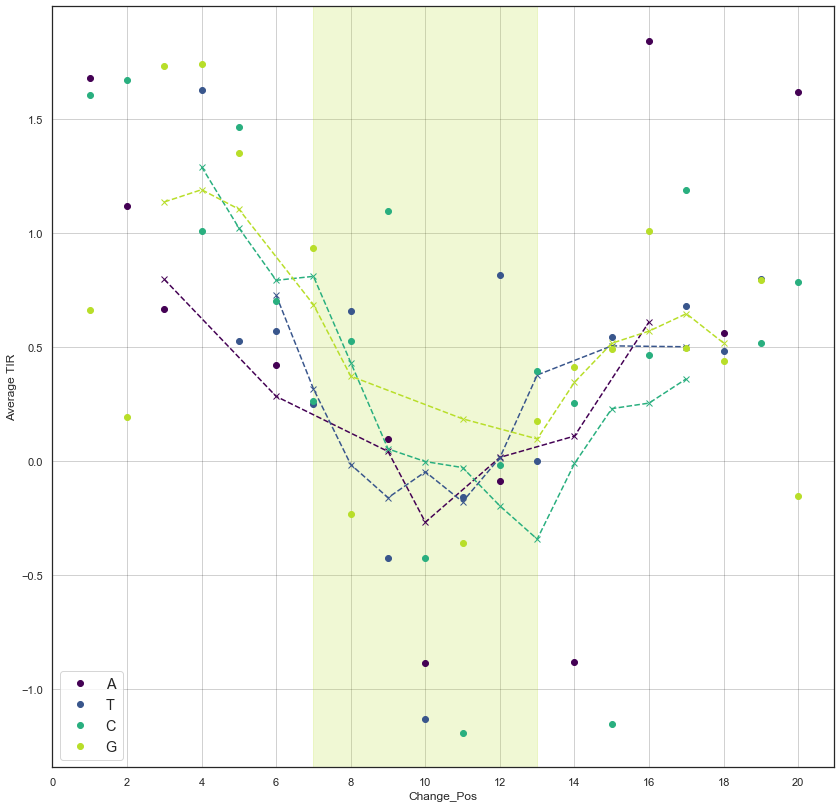

In [91]:
Path3 = '../../data/Pos_Change.csv'
df3 = pd.read_csv(Path3) [df3.AVERAGE != 2.592357456]
for base in 'ATCG':
    df3['Rolling' + base] = df3["AVERAGE"].loc[df3['Base'] == base].rolling(window=5,center=True).mean()
fig, ax = plt.subplots( figsize=(14,14))
for base,colour in zip('ATCG',('#440154FF','#39568CFF','#29AF7FFF','#B8DE29FF')):
    ax1 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['AVERAGE'].loc[df3['Base'] == base],ls=None,marker='o',linewidth=0,c=colour,label=base)
    ax2 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['Rolling' + base].loc[df3['Base'] == base],ls='--',marker='x',c=colour)
plt.axvspan(7, 13, color='#B8DE29FF', alpha=0.2)
ax.set_xlabel("Change_Pos");
ax.set_facecolor("white");
plt.grid(color='k', linestyle='-', linewidth=1,alpha=0.2);
plt.xticks(np.arange(0, 21, step=2))
ax.set_ylabel("Average TIR");
ax.legend(fontsize="large");

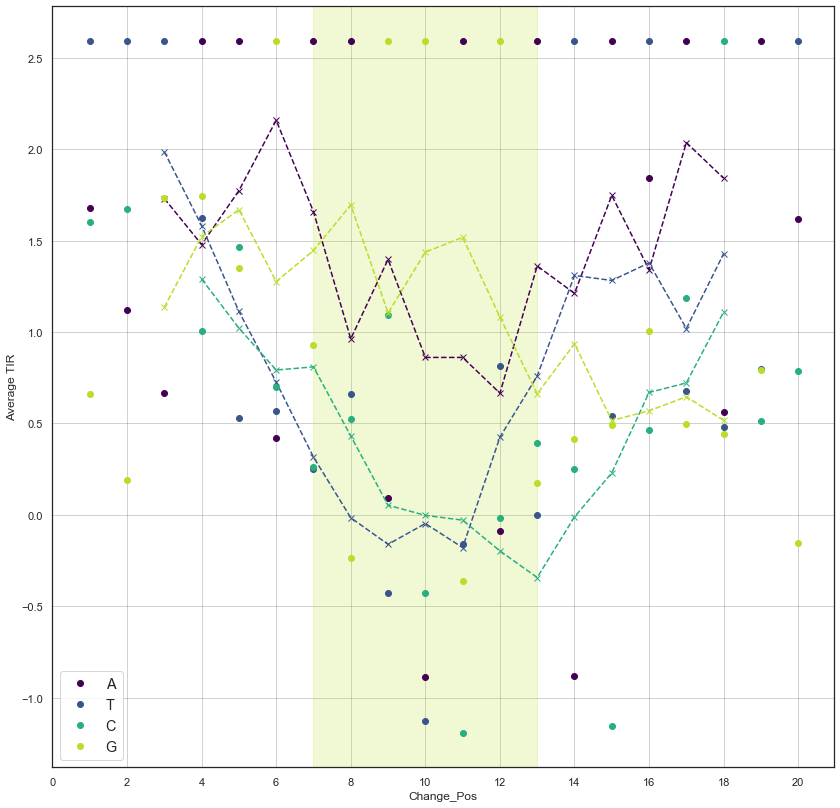

In [92]:
df3 = pd.read_csv(Path3)
for base in 'ATCG':
    df3['Rolling' + base] = df3["AVERAGE"].loc[df3['Base'] == base].rolling(window=5,center=True).mean()
fig, ax = plt.subplots( figsize=(14,14))
for base,colour in zip('ATCG',('#440154FF','#39568CFF','#29AF7FFF','#B8DE29FF')):
    ax1 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['AVERAGE'].loc[df3['Base'] == base],ls=None,marker='o',linewidth=0,c=colour,label=base)
    ax2 = plt.plot(df3['Change_Pos'].loc[df3['Base'] == base],df3['Rolling' + base].loc[df3['Base'] == base],ls='--',marker='x',c=colour)
plt.axvspan(7, 13, color='#B8DE29FF', alpha=0.2)
ax.set_xlabel("Change_Pos");
ax.set_facecolor("white");
plt.grid(color='k', linestyle='-', linewidth=1,alpha=0.2);
plt.xticks(np.arange(0, 21, step=2))
ax.set_ylabel("Average TIR");
ax.legend(fontsize="large");